## Libraries

In [1]:
# Pandas --> Data Frames
import pandas as pd

In [154]:
# numpy --> scientific computing with Python
import numpy as np

In [32]:
# matplotlib --> graphing library
from matplotlib import pyplot as plt
%matplotlib inline

# Seaborn --> makes matplotlib prettier
import seaborn as sb

In [75]:
# sklearn for linear regression and cross-validation
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

In [226]:
# statsmodels for linear regression
import statsmodels.api as sm

# statsmodels formula api
import statsmodels.formula.api as smf

In [79]:
# patsy dmatrices to create model matrix
from patsy import dmatrices

## Import Data

In [2]:
# Regular expression --> one or more white space -->  \s+
data = pd.read_csv("http://data.princeton.edu/wws509/datasets/salary.dat", sep='\s+')

## Explore Dataset

In [3]:
print len(data), 'rows'

52 rows


In [22]:
print data.columns.values

['sx' 'rk' 'yr' 'dg' 'yd' 'sl']


In [4]:
data.head()

,sx,rk,yr,dg,yd,sl
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696


- sx = Sex: male or female,
- rk = Rank: full, associate or assistant professor,
- yr = Number of years in current rank,
- dg = Highest degree: doctorate or masters,
- yd = Number of years since highest degree was earned,
- sl = Academic year salary, in dollars.

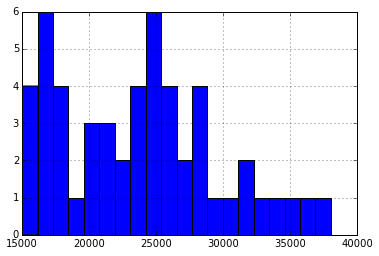

In [9]:
data.sl.hist(bins=20) 

### Categorical Variables

In [82]:
data['rk'].value_counts(dropna = False)

full         20
assistant    18
associate    14
dtype: int64

In [100]:
cols = data.columns

for i in cols:
   if type(data[i][0]) == str:
        print i
        print data[i].value_counts(dropna = False)

sx
male      38
female    14
dtype: int64
rk
full         20
assistant    18
associate    14
dtype: int64
dg
doctorate    34
masters      18
dtype: int64


### Correlations

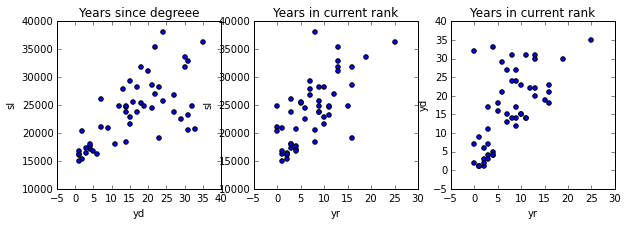

In [31]:
fig,axes = plt.subplots(ncols = 3)
f = data.plot(kind = 'scatter', x = 'yd', y = 'sl', ax = axes[0], title = "Years since degreee", figsize = (10,3))
f = data.plot(kind = 'scatter', x = 'yr', y = 'sl', ax = axes[1], title = "Years in current rank")
f = data.plot(kind = 'scatter', x = 'yr', y = 'yd', ax = axes[2], title = "Years in current rank")


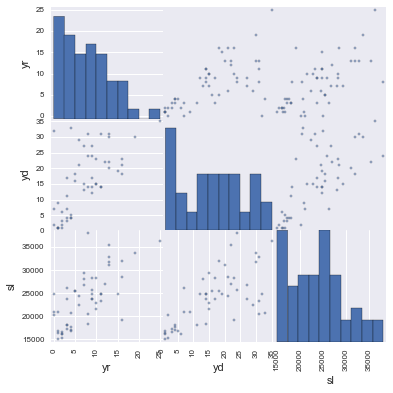

In [34]:
spm = pd.scatter_matrix(data, figsize=(6,6))

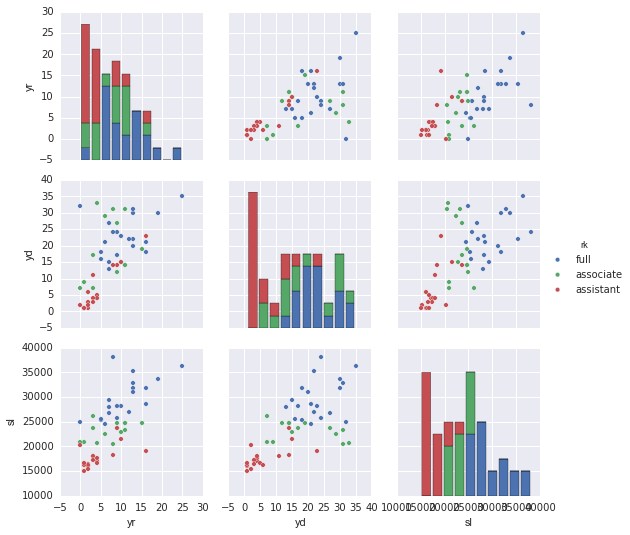

In [49]:
sb.pairplot(data[['yr', 'yd', 'sl', 'rk']], hue="rk")

## Regression with sklearn

### Fit Model

In [236]:
model = LinearRegression()
X,y = data[['yr', 'yd']], data['sl']
model.fit(X,y)
print model.score(X,y)
coefs = zip(model.coef_, X.columns)
print "sl = %.1f + " % model.intercept_ + \
    " + ".join("%.1f %s" % coef for coef in coefs)

0.578201922643
sl = 16555.7 + 489.3 yr + 222.3 yd


### Cross Validation

In [147]:
for _ in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .8)
    print model.fit(X_train, y_train).score(X_test, y_test).round(3),

0.424 0.584 0.681 0.223 0.656 0.554 0.424 0.314 0.509 0.32


### Categorical Features

In [220]:
y, X = dmatrices('sl ~ sx + yr + rk', data = data, return_type = "dataframe")

In [222]:
model = LinearRegression(fit_intercept=False)
model.fit(X,y)

print model.score(X,y)

coefs = zip(model.coef_[0], X.columns)
print "sl = " + " + ".join("%.1f %s" % coef for coef in coefs)

0.84617601349
sl = 16431.0 Intercept + -524.1 sx[T.male] + 4373.9 rk[T.associate] + 9483.8 rk[T.full] + 390.9 yr


## Regression with statsmodels

In [229]:
result = sm.OLS( y, sm.add_constant(X)).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sl   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     64.64
Date:                Sun, 01 Nov 2015   Prob (F-statistic):           1.64e-18
Time:                        21:01:47   Log-Likelihood:                -476.26
No. Observations:                  52   AIC:                             962.5
Df Residuals:                      47   BIC:                             972.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept        1.643e+04    737.966     22.265      0.000      1.49e+04  1.79e+04
sx[T.male]       -524.1492    834.687     -0.628      0.533     -2203.323  1155.024
rk[T.associate]  4373.9154    906.124      4.827      0.000      2551.030  6196.801
rk[T.full]       9483.8419    912.795     10.390      0.000      7647.536  1.13e+04
yr                390.9358     75.383      5.186      0.000       239.285   542.587
==============================================================================
Omnibus:                       23.039   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.727
Skew:                           1.410   Prob(JB):                     3.90e-09
Kurtosis:                       6.150   Cond. No.                         32.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Models with Interactions

In [230]:
model = smf.ols(" sl ~ sx*rk", data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sl   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     29.12
Date:                Sun, 01 Nov 2015   Prob (F-statistic):           3.41e-13
Time:                        21:01:53   Log-Likelihood:                -487.84
No. Observations:                  52   AIC:                             987.7
Df Residuals:                      46   BIC:                             999.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                   1.758e+04   1079.414     16.287      0.000      1.54e+04  1.98e+04
sx[T.male]                   339.6000   1448.186      0.235      0.816     -2575.447  3254.647
rk[T.associate]             3990.0000   2413.643      1.653      0.105      -868.412  8848.412
rk[T.full]                  1.123e+04   1869.600      6.004      0.000      7461.690   1.5e+04
sx[T.male]:rk[T.associate]  1533.9833   2744.912      0.559      0.579     -3991.237  7059.204
sx[T.male]:rk[T.full]        727.8375   2238.321      0.325      0.747     -3777.669  5233.344
==============================================================================
Omnibus:                        9.241   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                8.588
Skew:                           0.867   Prob(JB):                       0.0136
Kurtosis:                       3.979   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Converting numeric variables to categorical

In [232]:
model = smf.ols(" sl ~ sx*rk + C(yr)", data).fit()

## Visualizing Regression with Seaborn

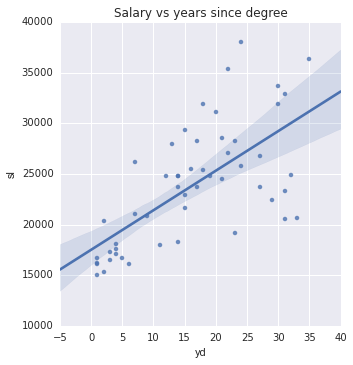

In [233]:
f = sb.lmplot(x = 'yd', y='sl', data=data)
f = plt.title("Salary vs years since degree")

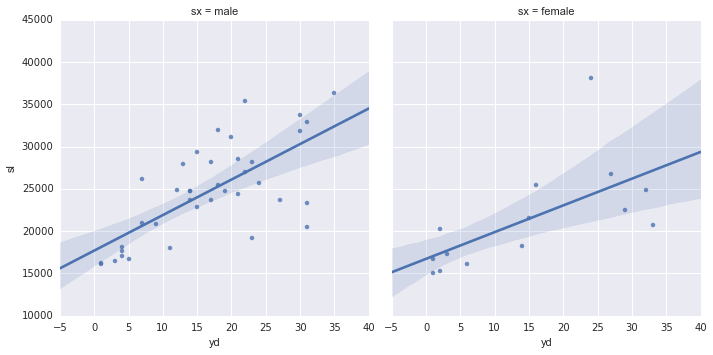

In [234]:
f = sb.lmplot(x = 'yd', y='sl', col='sx', data=data)

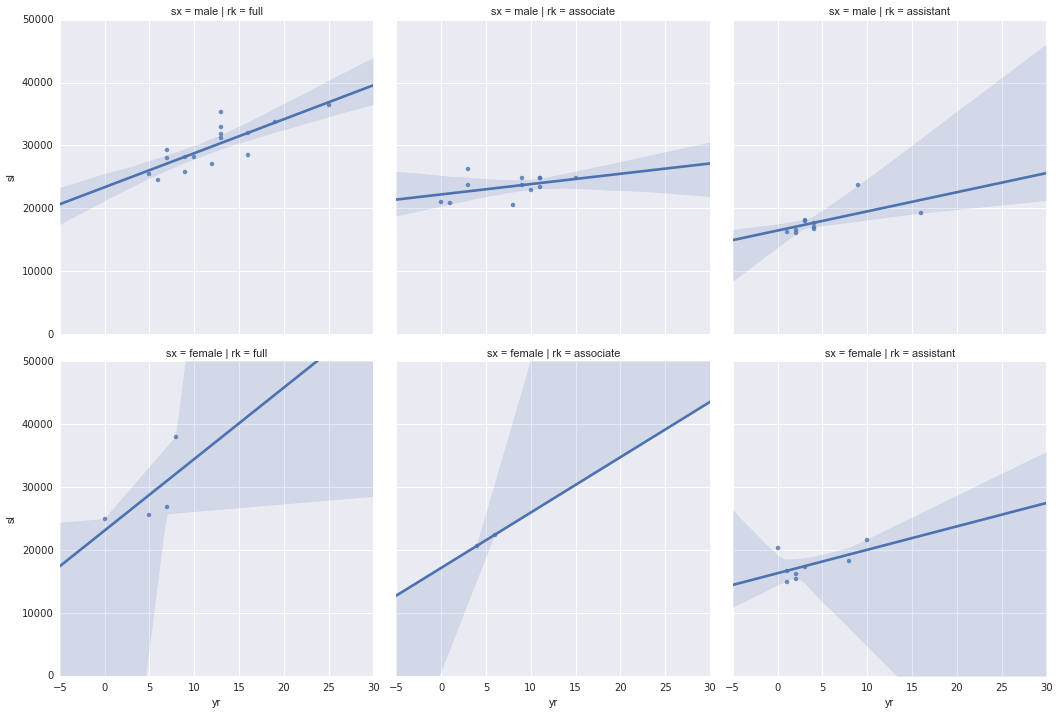

In [235]:
f = sb.lmplot(x = 'yr', y='sl', col='rk', row='sx', data=data)
f = plt.ylim(0, 50000)